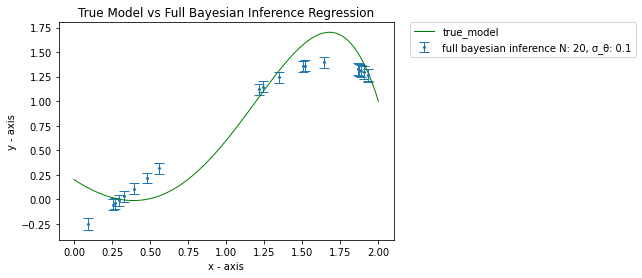

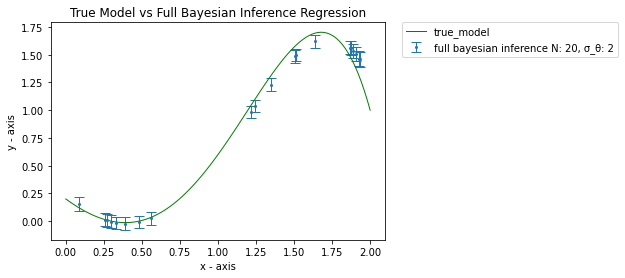

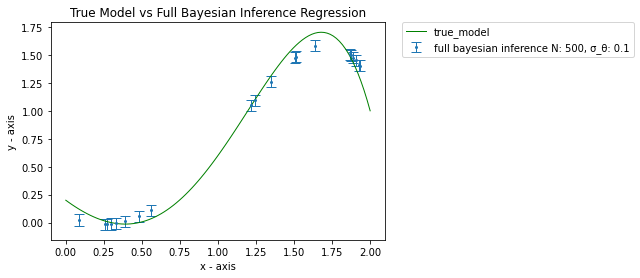

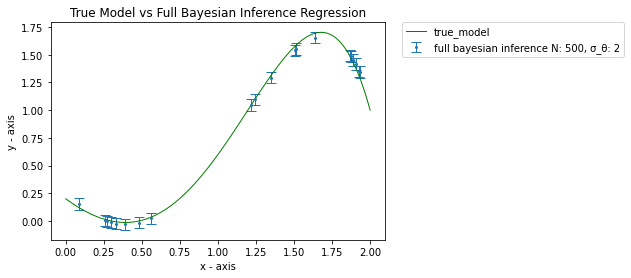

In [71]:
#  Assignment 1 - v - Full Bayesian Regression (mean vector θο not equal to true parameter vector)

# importing the required module 
import matplotlib.pyplot as plt 
import numpy as np
import random
import math

def get_y_train(t0, t1, t2, t3, t4, t5, mu, variance, N, x):

  noise = np.random.normal(mu,math.sqrt(variance), size=(N,))
  y = t5*x**5 + t4*x**4 + t3*x**3 + t2*x**2 + t1*x + t0 + noise

  return (y)

def bayesian_inference(N, sigma_theta, x_random):

  x_train = np.linspace(0, 2, num= N)
  th = [-1, 0.9, 0.7, 0, -0.2, 0.2]  # true paremeter vector
  theta_zero = np.array([-10.54, 0.465, 0.0087, 0, -0.093, -0.004]) # get the array from a list of values and get the transpose
  sigma_h = 0.05

  y_train = get_y_train(th[5], th[0], th[1], th[2], th[3], th[4], 0, sigma_h, N, x_train)

  Phi = np.zeros(shape = (N,6)) # 6 = polynomial degree + 1
  Phi[:, -1] = 1

  phi_x_random = []
  for i in range(0,5):
    phi_x_random.append(np.power(x_random,i+1)*theta_zero[i])
    Phi[:,i] = np.power(x_train,i+1)*theta_zero[i]

  phi_x_random.append(np.array([1]*x_random.shape[0]))

  est_th_y = theta_zero + 1 / sigma_h * np.linalg.inv(1 / sigma_theta * np.eye(6) + 1 / sigma_h * Phi.T.dot(Phi)).dot(Phi.T).dot(y_train - Phi.dot(theta_zero))

  # print('μ_θ_y:')
  # print(est_th_y)
  # print('\n')
  phi_x_random = np.array(phi_x_random)

  est_y = phi_x_random.T.dot(est_th_y)

  # print('μ_y:')
  # print(est_y)
  # print('\n')

  sigma_y = sigma_h + sigma_h * sigma_theta * phi_x_random.T.dot(np.linalg.inv(sigma_h * np.eye(6) + sigma_theta * Phi.T.dot(Phi))).dot(phi_x_random) # variance - covariance matrix
  y_var = sigma_y.diagonal()

  x_true = np.linspace(0, 2, 100)
  y_true = th[4]*x_true**5 + th[2]*x_true**3 + th[1]*x_true**2 + th[0]*x_true + th[5]


  # plt.plot(x_train, est_y, marker= 'o', markersize=5, linewidth=0, label='bayes')
  plt.errorbar(x_random, est_y, marker= 'o', markersize=2, linewidth=0, yerr= y_var, elinewidth = 1, capsize = 5, label='full bayesian inference N: ' + str(N) + ', σ_θ: ' + str(sigma_theta))
  plt.plot(x_true, y_true, '-g', linewidth=1, label= 'true_model')

  # naming the x axis 
  plt.xlabel('x - axis') 
  # naming the y axis 
  plt.ylabel('y - axis') 

  # giving a title to my graph 
  plt.title('True Model vs Full Bayesian Inference Regression') 

  # function to show the plot 
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.show()

random.seed()
x_random = np.array([])
for i in range(0, 20):
  x_random = np.append(x_random, [random.random()*2])

bayesian_inference(20, 0.1, x_random)
print('\n')
bayesian_inference(20, 2, x_random)
print('\n')
bayesian_inference(500, 0.1, x_random)
print('\n')
bayesian_inference(500, 2, x_random)